In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

     


# Load the dataset
file_path = 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv'
data = pd.read_csv(file_path)


     


# Preprocessing
close_prices = data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(close_prices_scaled, seq_length)

split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(GRU(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, reduce_lr])


C:\Users\dugga\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - loss: 5.8588e-05 - val_loss: 2.6652e-05 - learning_rate: 0.0010
Epoch 2/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 2.0386e-06 - val_loss: 1.1504e-05 - learning_rate: 0.0010
Epoch 3/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 34s 148ms/step - loss: 1.5039e-06 - val_loss: 2.5842e-05 - learning_rate: 0.0010
Epoch 4/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 34s 118ms/step - loss: 1.6479e-06 - val_loss: 9.0149e-06 - learning_rate: 0.0010
Epoch 5/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 1.5540e-06 - val_loss: 5.0081e-06 - learning_rate: 0.0010
Epoch 6/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 1.5989e-06 - val_loss: 1.4054e-05 - learning_rate: 0.0010
Epoch 7/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - loss: 1.2647e-06 - val_loss: 6.6187e-06 - learning_rate: 5.0000e-04
Epoch 8/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - loss: 7.3343e-07 - val_loss: 4.3480e-06 - learning_rate: 5.0000e-04
Epoch 9/100
233/233 

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.4031e-05
Test Loss: 0.00010138446668861434
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
RMSE: 1.8321608877057225
MAE: 1.068844852779547
MAPE: 1.6349591003760346


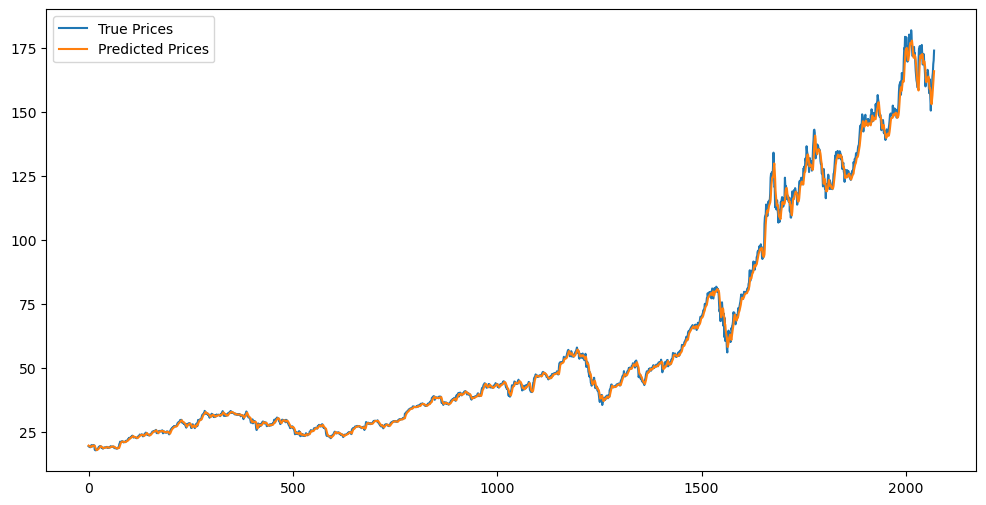

In [5]:
# Evaluate Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make Predictions
predictions = model.predict(X_test)
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# Plot Results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()